# Exploring NLTK package


This Markdown is a condensate of the RealPython webpages related to NLTK package in Python, adapted to our dataset. 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#nltk.download()
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Clarisse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Clarisse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

We will explore the *movies_metadata_english_only.csv* dataset with the **NLTK** to see what kind of metrics we can extract from titles. 

In [2]:
# import dataset
data=pd.read_csv('Data/movies_metadata_english_only.csv')
data.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
4,7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."


In [3]:
# list with titles only

Titles=data.Movie_name
Titles[1]

'Getting Away with Murder: The JonBenét Ramsey Mystery'

### Tokenizing

By tokenizing, you can conveniently split up text by word or by sentence. 

- Tokenizing by word: Tokenizing your text by word allows you to identify words that come up particularly often. (*sent_tokenize* function)

- Tokenizing by sentence: When you tokenize by sentence, you can analyze how those words relate to one another and see more context. (*word_tokensize* function)



In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize

### Filtering stop words

Stop words are words that you want to ignore, so you filter them out of your text when you’re processing it. Very common words like 'in', 'is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text in and of themselves.


In [5]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english")) # we focus on english titles only

In [6]:
title_ex=Titles[1]
title_ex

'Getting Away with Murder: The JonBenét Ramsey Mystery'

In [7]:
words_in_quote = word_tokenize(title_ex)
words_in_quote

['Getting',
 'Away',
 'with',
 'Murder',
 ':',
 'The',
 'JonBenét',
 'Ramsey',
 'Mystery']

In [9]:
filtered_list = []
for word in words_in_quote:
   if word.casefold() not in stop_words:
        filtered_list.append(word)

filtered_list


['Getting', 'Away', 'Murder', ':', 'JonBenét', 'Ramsey', 'Mystery']

### Stemming

Stemming is a text processing task in which you reduce words to their root, which is the core part of a word. For example, the words “helping” and “helper” share the root “help.” 

In [10]:
from nltk.stem import PorterStemmer

In [12]:
# create a stemmer
stemmer = PorterStemmer()

# we are using the previous list without stop words, filterd_list
stemmed_title=[stemmer.stem(word) for word in filtered_list]
stemmed_title

['get', 'away', 'murder', ':', 'jonbenét', 'ramsey', 'mysteri']

See "getting" has become "get" and "mystery" has become "mysteri".

*NB*: there are risk of under- and overstemming. 

### Tagging Parts of Speech

Now we come to one of the most interesting features of the NLTK package: Part of speech is a grammatical term that deals with the **roles words play** when you use them together in sentences. Tagging parts of speech, or POS tagging, is the task of labeling the words in your text according to their part of speech.

We can get 8 parts of speech for a text in English:
- **Noun**: a person, place or thing

- **Pronoun**: replaces a noun

- **Adjective**: gives information about what a noun is like

- **Verb**: an action or a state of being

- **Adverb**: gives information about how a noun or pronoun is connected to another word

- **Preposition**: gives information about how a noun or pronoun is connected to another word

- **Conjunction**: connects two other words or phrases

- **Interjection**: is an exclamation

In [13]:
nltk.pos_tag(filtered_list)

[('Getting', 'VBG'),
 ('Away', 'RB'),
 ('Murder', 'NN'),
 (':', ':'),
 ('JonBenét', 'NNP'),
 ('Ramsey', 'NNP'),
 ('Mystery', 'NNP')]

Each word of the quote is tagged with an abbreviation giving their part of speech. We can print a summary of those tags.

In [14]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

### Lemmatizing

Lemmatizing is used the same way as Stemming, but instead of giving a cropped version of the word stem, it gives you a complete English word that makes sense. It can be useful if we want to plot word clouds that are meaningful for example.

In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

'mysterious'

In [17]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_list]
lemmatized_words

['Getting', 'Away', 'Murder', ':', 'JonBenét', 'Ramsey', 'Mystery']

### Chunking

Chunking allows you to identify phrases when defining a special chunk grammar.

For instance: grammar = "NP: {<'DT'>?<'JJ'>*<'NN'>}" allows you to chunk sentences that 
- Start with an optional (?) determiner ('DT')
- Can have any number (*) of adjectives (JJ)
- End with a noun (<'NN'>)

Chunking can go together with chinking, which is used to exclude a pattern.

It doesn't seem like these two features of NLTK will be very useful in our project.

### Named Entity Recognition

While Tagging Parts of Speech was used to give a grammatical argument to each word, NER is used to find named identities and refer to it as: 
- organization
- person
- location
- date
- money
- percent
- facility
- GPE

In [23]:
ne_tree = nltk.ne_chunk(nltk.pos_tag(filtered_list))
print(ne_tree)

(S
  Getting/VBG
  Away/RB
  (PERSON Murder/NN)
  :/:
  (ORGANIZATION JonBenét/NNP Ramsey/NNP Mystery/NNP))


### Sentiment Analysis

Sentiment analysis can help you determine the ratio of positive to negative engagements about a specific topic.

#### Frequency distributions

A frequency distribution is essentially a table that tells you how many times each word appears within a given text. In NLTK, frequency distributions are a specific object type implemented as a distinct class called FreqDist. This class provides useful operations for word frequency analysis.

We can think of sticking all titles together for one condition and look at the number of occurence of certain words.

In [29]:
title_ex

'Getting Away with Murder: The JonBenét Ramsey Mystery'

In [31]:
# create frequency distribution
words: list[str] = nltk.word_tokenize(title_ex)
words
fd = nltk.FreqDist(words)

['Getting',
 'Away',
 'with',
 'Murder',
 ':',
 'The',
 'JonBenét',
 'Ramsey',
 'Mystery']

In [28]:
# print the 3 most frequent words
fd.most_common(3)

# print a tabular version
fd.tabulate(3)

Getting    Away    with 
      1       1       1 


Once you hace the frequency distribution, you can use it to directly look at the occurence of specific words.

In [32]:
fd["Murder"]

1

In [33]:
fd["murder"]

0

Here we see that lower and higher cases are differenciated, which we don't necessarely want. We can create a new frequency distribution where all words are lower cases.

In [34]:
lower_fd = nltk.FreqDist([w.lower() for w in fd])

#### Extracting Concordance and Collocations

Collocations are series of words that frequently appear together in a given text. In the State of the Union corpus, for example, you’d expect to find the words United and States appearing next to each other very often. Those two words appearing together is a collocation.

Collocations can be made up of two or more words. NLTK provides classes to handle several types of collocations:

- Bigrams: Frequent two-word combinations
- Trigrams: Frequent three-word combinations
- Quadgrams: Frequent four-word combinations

NLTK provides specific classes for you to find collocations in your text. Following the pattern you’ve seen so far, these classes are also built from lists of words:

In [41]:
words = [w for w in filtered_list if w.isalpha()] # getting rid of punctuation
finder = nltk.collocations.BigramCollocationFinder.from_words(words)

In [40]:
# find the most commom collocations
finder.ngram_fd.most_common(2)

[(('Getting', 'Away'), 1), (('Away', 'Murder'), 1)]

#### NLTK's Sentiment Analyzer (pre-trained)

NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).

Since VADER is pretrained, you can get results more quickly than with many other analyzers. However, VADER is best suited for language used in social media, like short sentences with some slang and abbreviations. It’s less accurate when rating longer, structured sentences. This point is actually very interesting for us since titles are usually short.



In [42]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

In [47]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(title_ex)

{'neg': 0.402, 'neu': 0.598, 'pos': 0.0, 'compound': -0.6908}

**Trying to customize NLTK's Sentiment Analysis**



# First visualizations


In [58]:
sia.polarity_scores(data.iloc[0].Movie_name)["neg"]

0.0

In [62]:
# sentiment analysis depending on genre

sia = SentimentIntensityAnalyzer()
L_pos=[]
L_neg=[]


for i in range(len(data)):
    movie_name = data.iloc[i].Movie_name
    scores = sia.polarity_scores(movie_name)
    L_pos.append(scores["pos"])
    L_neg.append(scores["neg"])


data['pos_sentiment']=L_pos
data['neg_sentiment']=L_neg

#data.head()

In [67]:
data.iloc[0].Movie_genres

'{"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}'

<AxesSubplot:xlabel='Principal_genre', ylabel='pos_sentiment'>

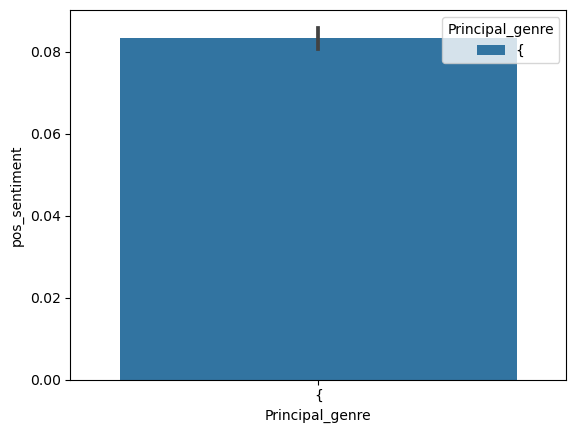

In [66]:
# plot the positive or negative sentiment index for each genre

#create column for principal movie genre

data["Principal_genre"]=[data.iloc[i].Movie_genres[0] for i in range (len(data))]

sns.barplot(data, x="Principal_genre", y="pos_sentiment",hue="Principal_genre")

